# Data from Murder Accountability Project

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.preprocessing import minmax_scaling

from jupyterthemes import jtplot
jtplot.style(figsize=(15, 9))

## Data

In [2]:
map_data = pd.read_csv('data/SHR65_22.csv', index_col=0)
map_data.head()

,CNTYFIPS,Ori,State,Agency,Agentype,Source,Solved,Year,Month,Incident,...,OffRace,OffEthnic,Weapon,Relationship,Circumstance,Subcircum,VicCount,OffCount,FileDate,MSA
ID,,,,,,,,,,,,,,,,,,,,,
197601001AKASP00,"Juneau, AK",AKASP00,Alaska,State Troopers,Primary state LE,FBI,Yes,1976,January,1,...,American Indian or Alaskan Native,Unknown or not reported,Knife or cutting instrument,Husband,Other arguments,NaN,0,0,30180.0,Rural Alaska
197601001AL00102,"Jefferson, AL",AL00102,Alabama,Birmingham,Municipal police,FBI,Yes,1976,January,1,...,Black,Unknown or not reported,Shotgun,Acquaintance,Felon killed by private citizen,Felon killed in commission of a crime,0,0,30180.0,"Birmingham-Hoover, AL"
197601001AL00104,"Jefferson, AL",AL00104,Alabama,Fairfield,Municipal police,FBI,Yes,1976,January,1,...,Black,Unknown or not reported,Shotgun,Wife,Other,NaN,0,0,30180.0,"Birmingham-Hoover, AL"
197601001AL00106,"Jefferson, AL",AL00106,Alabama,Leeds,Municipal police,FBI,Yes,1976,January,1,...,Black,Unknown or not reported,Knife or cutting instrument,Brother,Other arguments,NaN,0,0,30180.0,"Birmingham-Hoover, AL"
197601001AL00201,"Mobile, AL",AL00201,Alabama,Mobile,Municipal police,FBI,Yes,1976,January,1,...,White,Unknown or not reported,Strangulation - hanging,Acquaintance,Circumstances undetermined,NaN,0,0,30180.0,"Mobile, AL"


## General Information about the data

In [8]:
map_data.shape

(870936, 29)

In [9]:
map_data.dtypes

CNTYFIPS         object
Ori              object
State            object
Agency           object
Agentype         object
Source           object
Solved           object
Year              int64
Month            object
Incident          int64
ActionType       object
Homicide         object
Situation        object
VicAge            int64
VicSex           object
VicRace          object
VicEthnic        object
OffAge            int64
OffSex           object
OffRace          object
OffEthnic        object
Weapon           object
Relationship     object
Circumstance     object
Subcircum        object
VicCount          int64
OffCount          int64
FileDate        float64
MSA              object
dtype: object

In [5]:
map_data.isna().sum()

CNTYFIPS             0
Ori                  0
State                0
Agency               0
Agentype             0
Source               0
Solved               0
Year                 0
Month                0
Incident             0
ActionType           0
Homicide             0
Situation            0
VicAge               0
VicSex               0
VicRace              0
VicEthnic            0
OffAge               0
OffSex               0
OffRace              0
OffEthnic            0
Weapon               0
Relationship         0
Circumstance         0
Subcircum       837170
VicCount             0
OffCount             0
FileDate         30165
MSA                  0
dtype: int64

In [37]:
cases_by_state = map_data.groupby('State').count().sort_values(by=['CNTYFIPS'], ascending=False)['CNTYFIPS']
cases_by_year = map_data.groupby('Year').count()['CNTYFIPS']

Text(0.5, 1.0, 'Cases by Year')

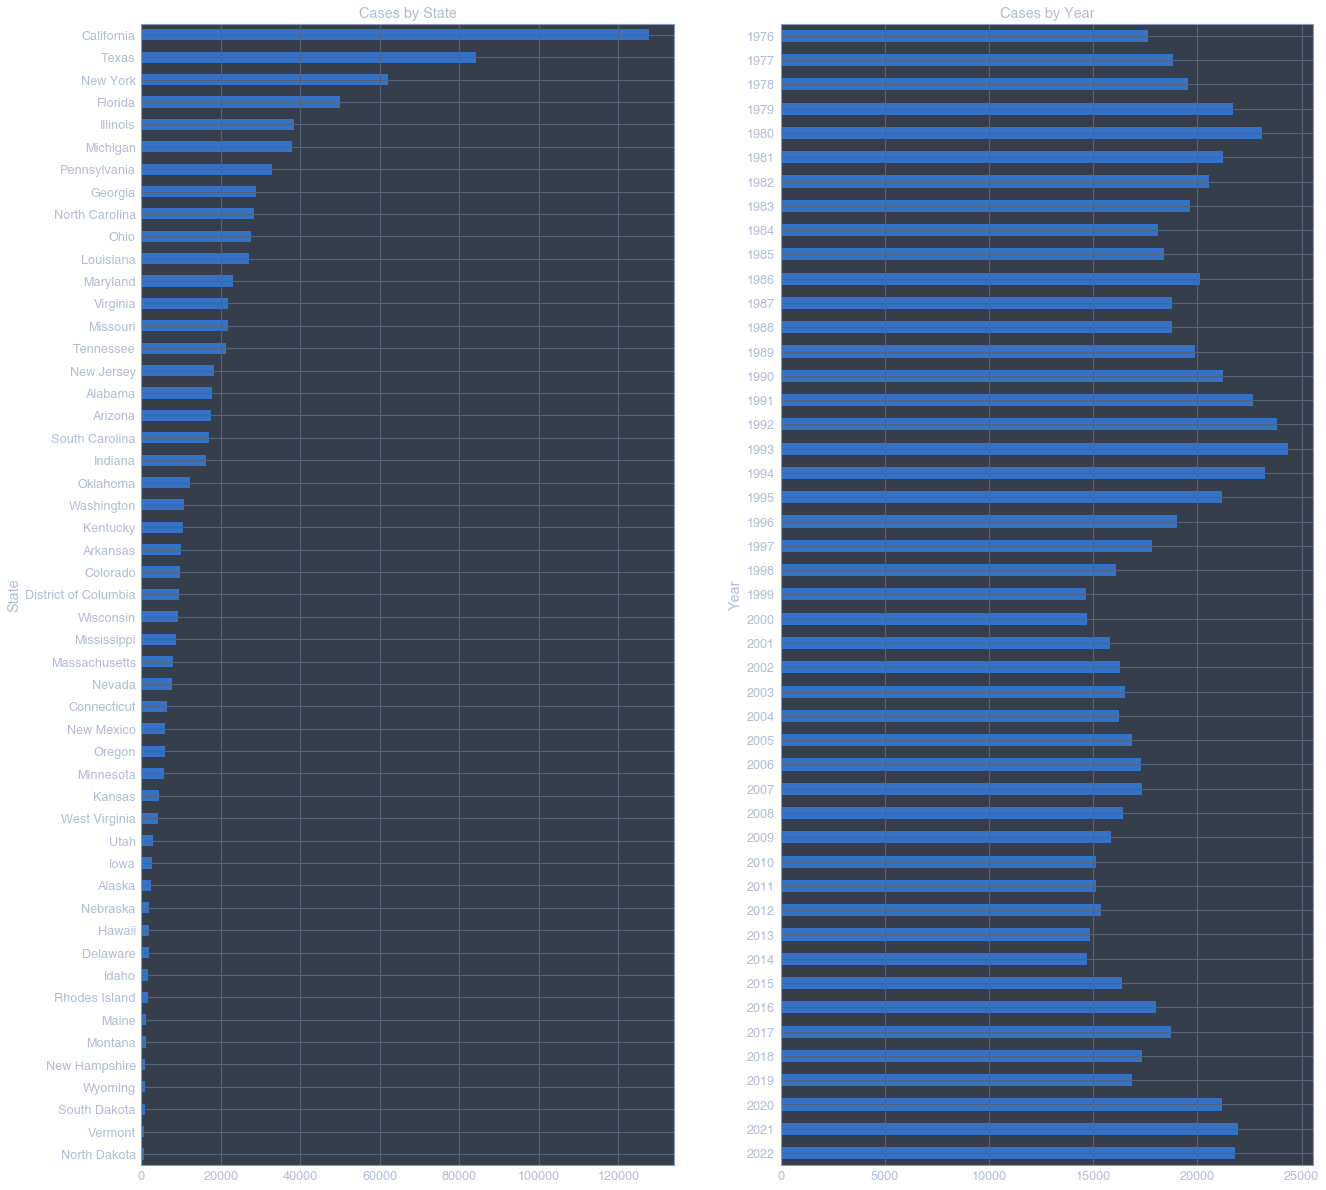

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(21, 21))

cases_by_state.plot(kind='barh', ax=ax[0]).invert_yaxis()
ax[0].set_title('Cases by State')

cases_by_year.plot(kind='barh', ax=ax[1]).invert_yaxis()
ax[1].set_title('Cases by Year')

In [6]:
map_data.groupby('Solved').count()

,CNTYFIPS,Ori,State,Agency,Agentype,Source,Year,Month,Incident,ActionType,...,OffRace,OffEthnic,Weapon,Relationship,Circumstance,Subcircum,VicCount,OffCount,FileDate,MSA
Solved,,,,,,,,,,,,,,,,,,,,,
No,256868,256868,256868,256868,256868,256868,256868,256868,256868,256868,...,256868,256868,256868,256868,256868,2683,256868,256868,249179,256868
Yes,614068,614068,614068,614068,614068,614068,614068,614068,614068,614068,...,614068,614068,614068,614068,614068,31083,614068,614068,591592,614068


<AxesSubplot:xlabel='Solved'>

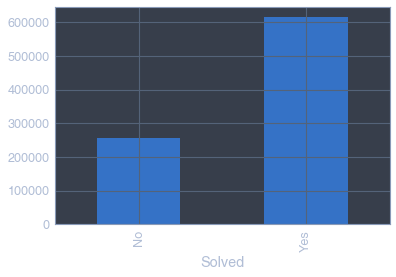

In [12]:
map_data.groupby('Solved').count()['CNTYFIPS'].plot(kind='bar')

In [39]:
not_solved_cases_by_state = map_data[map_data['Solved']=='No'].groupby('State')\
                                                              .count()\
                                                              .sort_values(by=['CNTYFIPS'],
                                                                           ascending=False)['CNTYFIPS'].to_frame()

solved_cases_by_state = map_data[map_data['Solved']=='Yes'].groupby('State')\
                                                           .count()\
                                                           .sort_values(by=['CNTYFIPS'],
                                                                        ascending=False)['CNTYFIPS']

cases_by_state = not_solved_cases_by_state.merge(solved_cases_by_state, on='State')

cases_by_state.rename(columns={'CNTYFIPS_x': 'Not Solved',
                               'CNTYFIPS_y': 'Solved'}, inplace=True)

In [37]:
not_solved_cases_by_year = map_data[map_data['Solved']=='No'].groupby('Year')\
                                                              .count()['CNTYFIPS'].to_frame()

solved_cases_by_year = map_data[map_data['Solved']=='Yes'].groupby('Year')\
                                                          .count()['CNTYFIPS']

cases_by_year = not_solved_cases_by_year.merge(solved_cases_by_year, on='Year')

cases_by_year.rename(columns={'CNTYFIPS_x': 'Not Solved',
                              'CNTYFIPS_y': 'Solved'}, inplace=True)

Text(0.5, 1.0, 'Cases by Year')

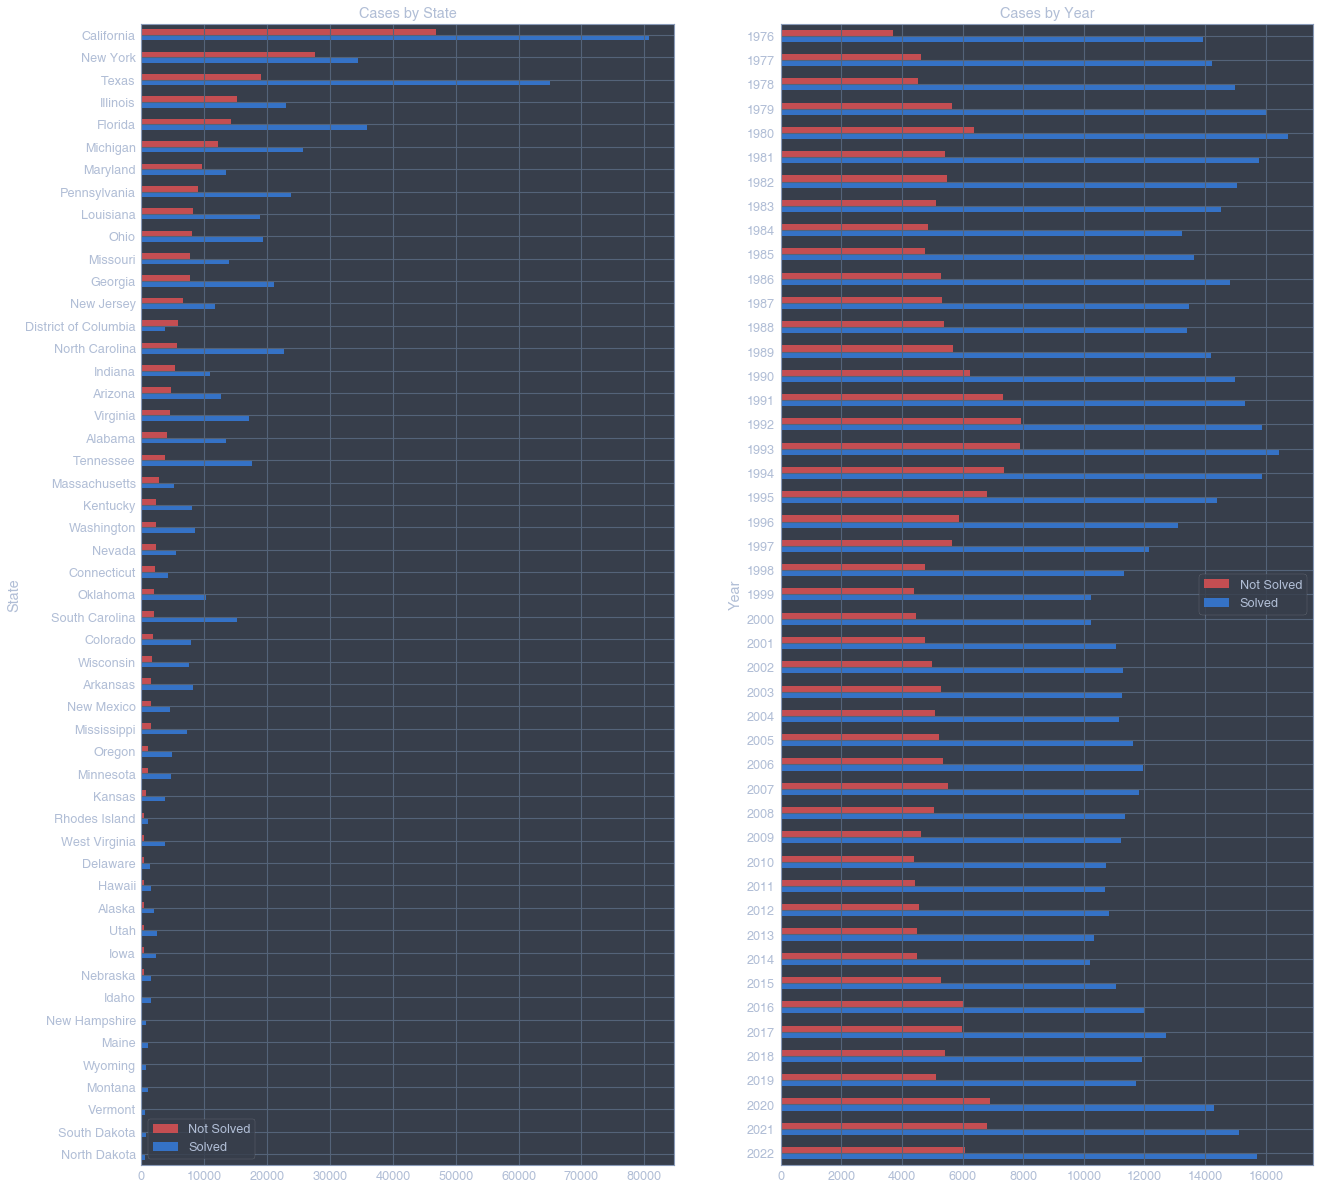

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(21, 21))

colors = ['r', 'b']

cases_by_state.plot(kind='barh', ax=ax[0], color=colors).invert_yaxis()
ax[0].set_title('Cases by State')

cases_by_year.plot(kind='barh', ax=ax[1], color=colors).invert_yaxis()
ax[1].set_title('Cases by Year')

In [43]:
cases_w_female_victim_sex = map_data[map_data['VicSex']=='Female'].groupby('Year')\
                                                                  .count()['CNTYFIPS'].to_frame()

cases_w_male_victim_sex = map_data[map_data['VicSex']=='Male'].groupby('Year')\
                                                              .count()['CNTYFIPS']

cases_by_sex_year = cases_w_female_victim_sex.merge(cases_w_male_victim_sex, on='Year')

cases_by_sex_year.rename(columns={'CNTYFIPS_x': 'Female',
                                  'CNTYFIPS_y': 'Male'}, inplace=True)

In [44]:
cases_w_female_victim_sex = map_data[map_data['VicSex']=='Female'].groupby('State')\
                                                                  .count()\
                                                                  .sort_values(by=['CNTYFIPS'],
                                                                               ascending=False)['CNTYFIPS'].to_frame()

cases_w_male_victim_sex = map_data[map_data['VicSex']=='Male'].groupby('State')\
                                                              .count()\
                                                              .sort_values(by=['CNTYFIPS'],
                                                                           ascending=False)['CNTYFIPS']

cases_by_sex_state = cases_w_female_victim_sex.merge(cases_w_male_victim_sex, on='State')

cases_by_sex_state.rename(columns={'CNTYFIPS_x': 'Female',
                                   'CNTYFIPS_y': 'Male'}, inplace=True)

Text(0.5, 1.0, 'Cases by Sex and Year')

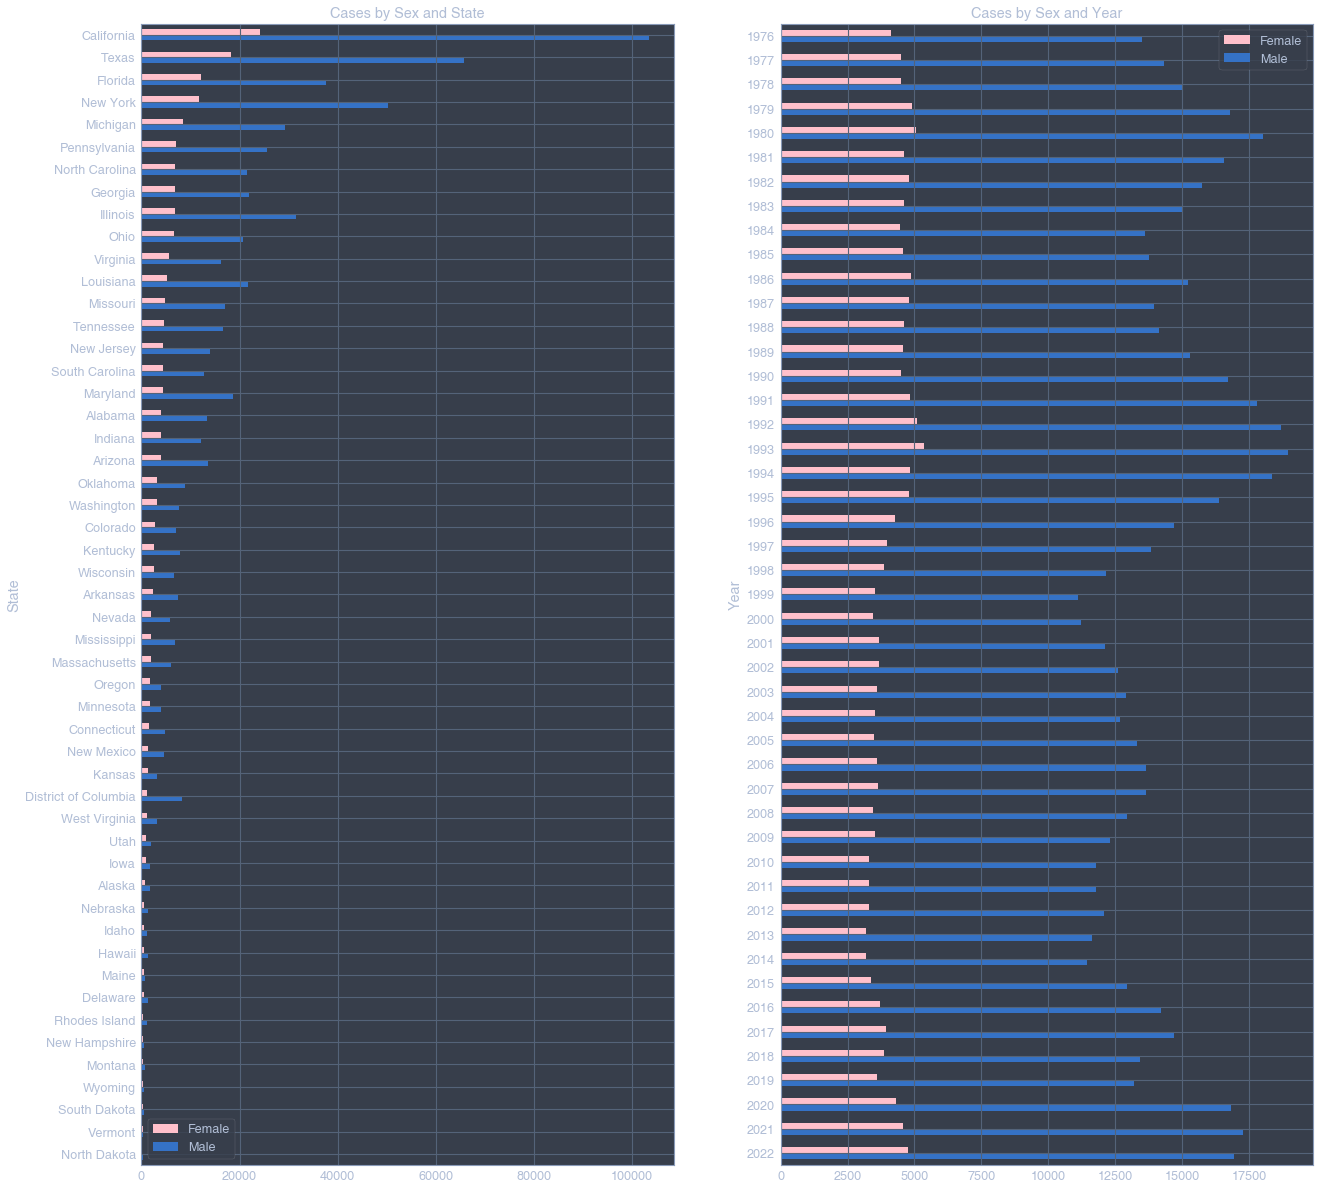

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(21, 21))
colors = ['pink', 'b']
cases_by_sex_state.plot(kind='barh', ax=ax[0], color=colors).invert_yaxis()
cases_by_sex_year.plot(kind='barh', ax=ax[1], color=colors).invert_yaxis()
ax[0].set_title('Cases by Sex and State')
ax[1].set_title('Cases by Sex and Year')

In [16]:
map_data[map_data['Solved']=='No'].groupby('VicSex').count()

,CNTYFIPS,Ori,State,Agency,Agentype,Source,Solved,Year,Month,Incident,...,OffRace,OffEthnic,Weapon,Relationship,Circumstance,Subcircum,VicCount,OffCount,FileDate,MSA
VicSex,,,,,,,,,,,,,,,,,,,,,
Female,42988,42988,42988,42988,42988,42988,42988,42988,42988,42988,...,42988,42988,42988,42988,42988,56,42988,42988,41977,42988
Male,212967,212967,212967,212967,212967,212967,212967,212967,212967,212967,...,212967,212967,212967,212967,212967,2616,212967,212967,206331,212967
Unknown,913,913,913,913,913,913,913,913,913,913,...,913,913,913,913,913,11,913,913,871,913


<AxesSubplot:xlabel='VicSex'>

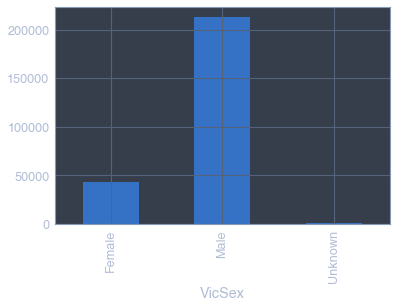

In [22]:
map_data[map_data['Solved']=='No'].groupby('VicSex').count()['CNTYFIPS'].plot(kind='bar')

In [15]:
relationship = map_data.groupby('Relationship').count().sort_values(by=['CNTYFIPS'], ascending=False)['CNTYFIPS']
subcircum = map_data.groupby('Subcircum').count().sort_values(by=['CNTYFIPS'], ascending=False)['CNTYFIPS']
situation = map_data.groupby('Situation').count().sort_values(by=['CNTYFIPS'], ascending=False)['CNTYFIPS']
homicide = map_data.groupby('Homicide').count().sort_values(by=['CNTYFIPS'], ascending=False)['CNTYFIPS']
circumstance = map_data.groupby('Circumstance').count().sort_values(by=['CNTYFIPS'], ascending=False)['CNTYFIPS']
weapon = map_data.groupby('Weapon').count().sort_values(by=['CNTYFIPS'], ascending=False)['CNTYFIPS']

Text(0.5, 1.0, 'Cases by Homicide')

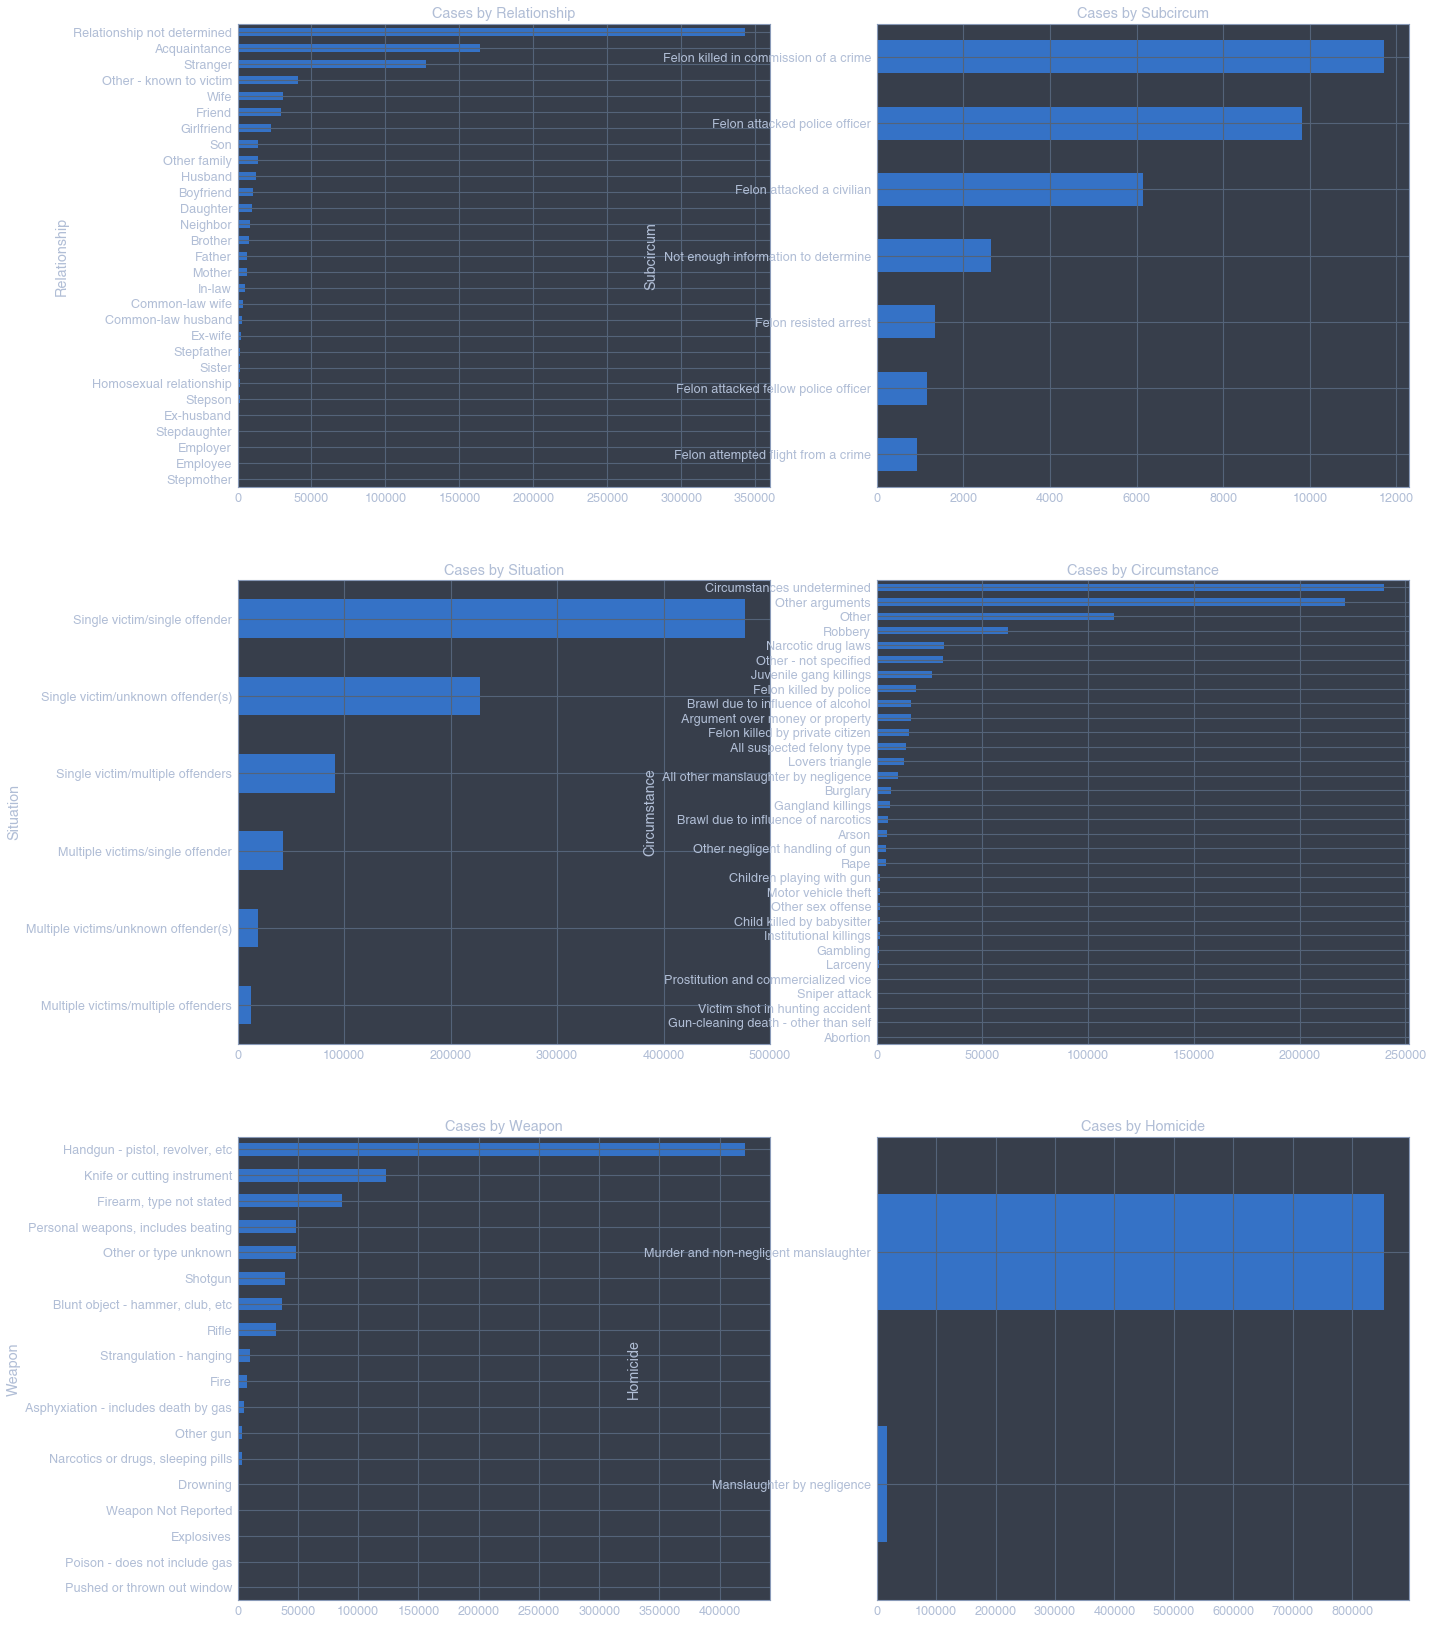

In [17]:
fig, ax = plt.subplots(3, 2, figsize=(21, 29))

relationship.plot(kind='barh', ax=ax[0, 0]).invert_yaxis()
ax[0, 0].set_title('Cases by Relationship')

subcircum.plot(kind='barh', ax=ax[0, 1]).invert_yaxis()
ax[0, 1].set_title('Cases by Subcircum')

situation.plot(kind='barh', ax=ax[1, 0]).invert_yaxis()
ax[1, 0].set_title('Cases by Situation')

circumstance.plot(kind='barh', ax=ax[1, 1]).invert_yaxis()
ax[1, 1].set_title('Cases by Circumstance')

weapon.plot(kind='barh', ax=ax[2, 0]).invert_yaxis()
ax[2, 0].set_title('Cases by Weapon')

homicide.plot(kind='barh', ax=ax[2, 1]).invert_yaxis()
ax[2, 1].set_title('Cases by Homicide')

In [19]:
map_data[map_data['Solved']=='No'].groupby(['Year', 'VicSex']).count()

CNTYFIPS   Ori  State  Agency  Agentype  Source  Solved  Month  \
Year VicSex                                                                    
1976 Female        886   886    886     886       886     886     886    886   
     Male         2806  2806   2806    2806      2806    2806    2806   2806   
     Unknown        10    10     10      10        10      10      10     10   
1977 Female       1131  1131   1131    1131      1131    1131    1131   1131   
     Male         3476  3476   3476    3476      3476    3476    3476   3476   
...                ...   ...    ...     ...       ...     ...     ...    ...   
2021 Male         5898  5898   5898    5898      5898    5898    5898   5898   
     Unknown        30    30     30      30        30      30      30     30   
2022 Female        721   721    721     721       721     721     721    721   
     Male         5315  5315   5315    5315      5315    5315    5315   5315   
     Unknown        42    42     42      42        42      42      42     42   

              Incident  ActionType  ...  OffRace  OffEthnic  Weapon  \
Year VicSex                         ...                               
1976 Female        886         886  ...      886        886     886   
     Male         2806        2806  ...     2806       2806    2806   
     Unknown        10          10  ...       10         10      10   
1977 Female       1131        1131  ...     1131       1131    1131   
     Male         3476        3476  ...     3476       3476    3476   
...                ...         ...  ...      ...        ...     ...   
2021 Male         5898        5898  ...     5898       5898    5898   
     Unknown        30          30  ...       30         30      30   
2022 Female        721         721  ...      721        721     721   
     Male         5315        5315  ...     5315       5315    5315   
     Unknown        42          42  ...       42         42      42   

              Relationship  Circumstance  Subcircum  VicCount  OffCount  \
Year VicSex                                                               
1976 Female            886           886          0       886       886   
     Male             2806          2806         71      2806      2806   
     Unknown            10            10          0        10        10   
1977 Female           1131          1131          0      1131      1131   
     Male             3476          3476         81      3476      3476   
...                    ...           ...        ...       ...       ...   
2021 Male             5898          5898          6      5898      5898   
     Unknown            30            30          0        30        30   
2022 Female            721           721          0       721       721   
     Male             5315          5315         14      5315      5315   
     Unknown            42            42          0        42        42   

              FileDate   MSA  
Year VicSex                   
1976 Female        886   886  
     Male         2806  2806  
     Unknown        10    10  
1977 Female       1131  1131  
     Male         3476  3476  
...                ...   ...  
2021 Male         3137  5898  
     Unknown         8    30  
2022 Female        267   721  
     Male         2069  5315  
     Unknown        23    42  

[141 rows x 27 columns]

In [17]:
map_data[(map_data['Solved']=='No') & (map_data['VicSex']=='Unknown')].groupby('Weapon').count()

,CNTYFIPS,Ori,State,Agency,Agentype,Source,Solved,Year,Month,Incident,...,OffSex,OffRace,OffEthnic,Relationship,Circumstance,Subcircum,VicCount,OffCount,FileDate,MSA
Weapon,,,,,,,,,,,,,,,,,,,,,
Asphyxiation - includes death by gas,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,0,3,3,3,3
"Blunt object - hammer, club, etc",20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,0,20,20,20,20
Drowning,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,1
Fire,31,31,31,31,31,31,31,31,31,31,...,31,31,31,31,31,0,31,31,31,31
"Firearm, type not stated",132,132,132,132,132,132,132,132,132,132,...,132,132,132,132,132,0,132,132,113,132
"Handgun - pistol, revolver, etc",159,159,159,159,159,159,159,159,159,159,...,159,159,159,159,159,2,159,159,152,159
Knife or cutting instrument,53,53,53,53,53,53,53,53,53,53,...,53,53,53,53,53,0,53,53,53,53
"Narcotics or drugs, sleeping pills",4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,0,4,4,4,4
Other gun,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,0,9,9,9,9


In [4]:
weapon_for_female = map_data[(map_data['Solved']=='No')
                             & (map_data['VicSex']=='Female')].groupby('Weapon')\
                                                              .count()\
                                                              .sort_values(by=['CNTYFIPS'], ascending=False)['CNTYFIPS'].to_frame()

weapon_for_male = map_data[(map_data['Solved']=='No') 
                           & (map_data['VicSex']=='Male')].groupby('Weapon')\
                                                          .count()\
                                                          .sort_values(by=['CNTYFIPS'], ascending=False)['CNTYFIPS']

weapon_by_victims_sex = weapon_for_female.merge(weapon_for_male, on='Weapon')
weapon_by_victims_sex.rename(columns={'CNTYFIPS_x': 'Female', 'CNTYFIPS_y': 'Male'}, inplace=True)

In [12]:
weapon_by_victims_sex_min_max = minmax_scaling(weapon_by_victims_sex, columns=['Female', 'Male'])
weapon_by_victims_sex_min_max

,Female,Male
Weapon,,
"Handgun - pistol, revolver, etc",1.000000,1.000000
Knife or cutting instrument,0.628264,0.152262
Other or type unknown,0.577780,0.098731
"Firearm, type not stated",0.358721,0.301649
"Personal weapons, includes beating",0.309721,0.037858
"Blunt object - hammer, club, etc",0.283256,0.065248
Strangulation - hanging,0.276269,0.011616
Fire,0.086383,0.012924
Asphyxiation - includes death by gas,0.057647,0.004350


In [29]:
weapon_by_victims_sex

,Female,Male
Weapon,,
"Handgun - pistol, revolver, etc",11462,119335
Knife or cutting instrument,7206,18188
Other or type unknown,6628,11801
"Firearm, type not stated",4120,36012
"Personal weapons, includes beating",3559,4538
"Blunt object - hammer, club, etc",3256,7806
Strangulation - hanging,3176,1407
Fire,1002,1563
Asphyxiation - includes death by gas,673,540


Text(0.5, 1.0, 'Weapon by victims sex(min-max scalling)')

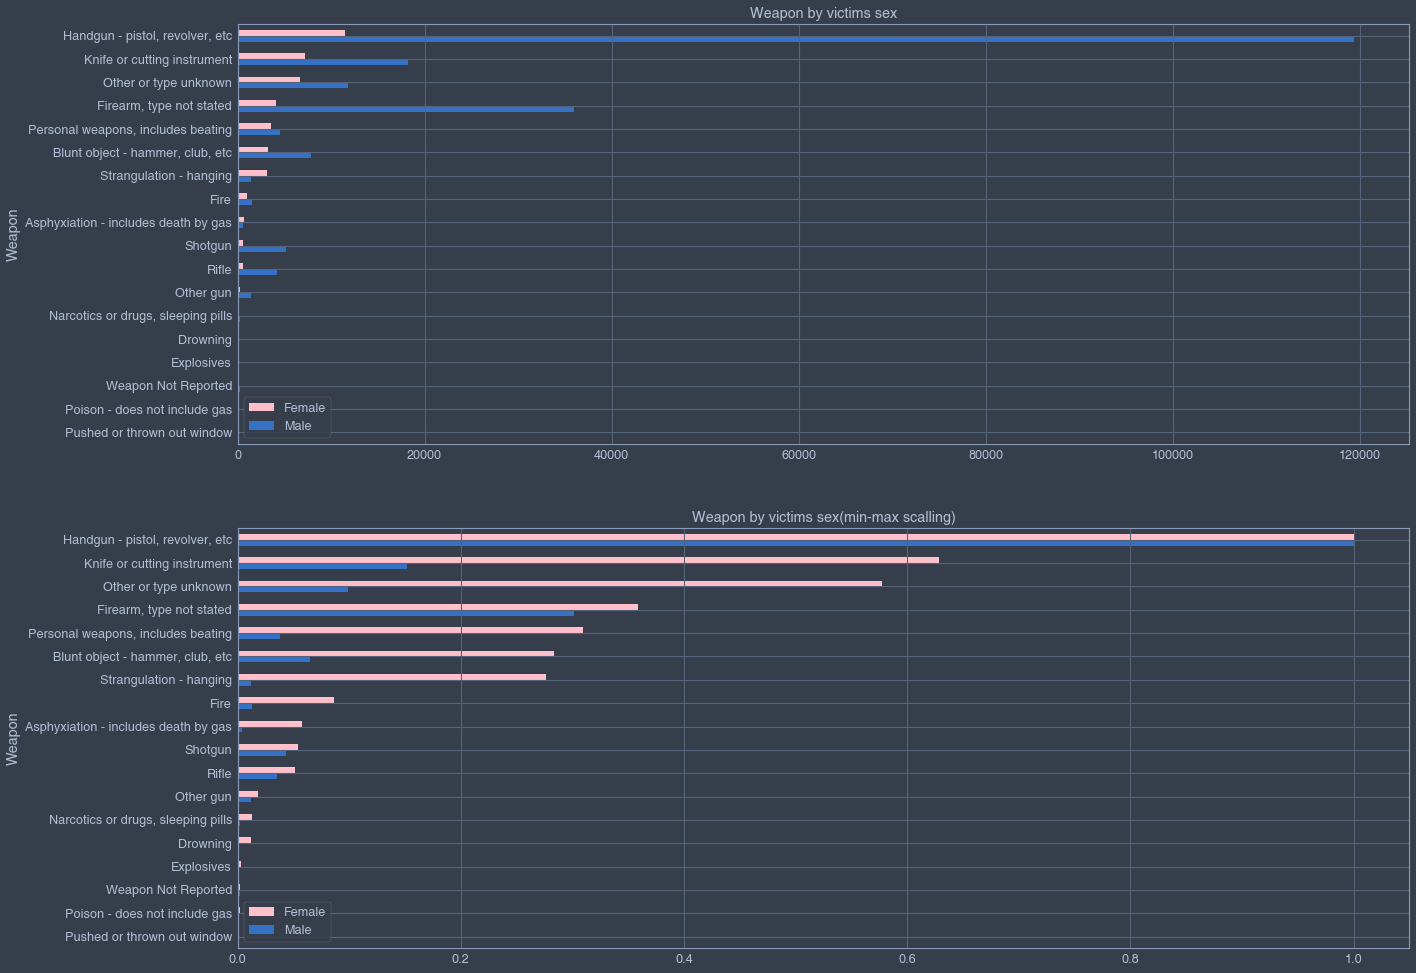

In [13]:
fig, ax = plt.subplots(2, 1, figsize=(21, 17))
colors = ['pink', 'b']
weapon_by_victims_sex.plot(kind='barh', color=colors, ax=ax[0]).invert_yaxis()
weapon_by_victims_sex_min_max.plot(kind='barh', color=colors, ax=ax[1]).invert_yaxis()
ax[0].set_title('Weapon by victims sex')
ax[1].set_title('Weapon by victims sex(min-max scalling)')

Text(0.5, 1.0, 'Murders by Month')

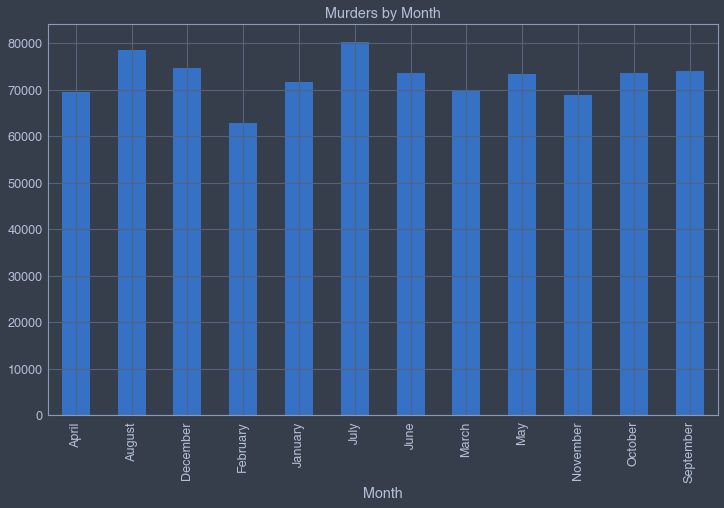

In [16]:
fig, ax = plt.subplots()
map_data.groupby('Month').count()['CNTYFIPS'].plot(kind='bar', ax=ax)
ax.set_title('Murders by Month')

In [28]:
map_data.groupby(['Year', 'Month']).count().sort_values(by=['CNTYFIPS'], ascending=False)['CNTYFIPS'].to_frame()

CNTYFIPS
Year Month             
1992 December      2636
1980 August        2371
1993 August        2262
     July          2250
2022 July          2198
...                 ...
2012 February      1011
2013 February       995
2010 February       975
2014 February       963
2011 February       942

[564 rows x 1 columns]

In [31]:
map_data[(map_data['Year']==1992) & (map_data['Month']=='December')].groupby('State')\
                                                                    .count()\
                                                                    .sort_values(by=['CNTYFIPS'],
                                                                                 ascending=False)['CNTYFIPS'].to_frame()

,CNTYFIPS
State,
Alabama,391
California,334
Kentucky,218
Texas,209
New York,184
Florida,117
Michigan,94
Illinois,94
North Carolina,65


In [32]:
map_data[map_data['Year']==1992].groupby('State').count()\
                                                 .sort_values(by=['CNTYFIPS'],
                                                              ascending=False)['CNTYFIPS'].to_frame()

,CNTYFIPS
State,
California,4195
New York,2447
Texas,2359
Illinois,1262
Florida,1257
Michigan,985
Pennsylvania,772
North Carolina,728
Louisiana,690


In [4]:
alabama_1992_dec = map_data[(map_data['Year']==1992) & (map_data['Month']=='December') & (map_data['State']=='Alabama')]
alabama_1992_dec

,CNTYFIPS,Ori,State,Agency,Agentype,Source,Solved,Year,Month,Incident,...,OffRace,OffEthnic,Weapon,Relationship,Circumstance,Subcircum,VicCount,OffCount,FileDate,MSA
ID,,,,,,,,,,,,,,,,,,,,,
199212001AL00100,"Jefferson, AL",AL00100,Alabama,Jefferson County,Sheriff,FBI,Yes,1992,December,1,...,White,Unknown or not reported,"Handgun - pistol, revolver, etc",Husband,Other arguments,NaN,0,0,43093.0,"Birmingham-Hoover, AL"
199212001AL00102,"Jefferson, AL",AL00102,Alabama,Birmingham,Municipal police,FBI,No,1992,December,1,...,Unknown,Unknown or not reported,"Handgun - pistol, revolver, etc",Relationship not determined,Circumstances undetermined,NaN,0,0,43093.0,"Birmingham-Hoover, AL"
199212001AL00104,"Jefferson, AL",AL00104,Alabama,Fairfield,Municipal police,FBI,Yes,1992,December,1,...,Black,Unknown or not reported,"Handgun - pistol, revolver, etc",Relationship not determined,Circumstances undetermined,NaN,0,0,43093.0,"Birmingham-Hoover, AL"
199212001AL00107,"Jefferson, AL",AL00107,Alabama,Midfield,Municipal police,FBI,Yes,1992,December,1,...,Black,Unknown or not reported,"Handgun - pistol, revolver, etc",Wife,Other arguments,NaN,0,0,43093.0,"Birmingham-Hoover, AL"
199212001AL00108,"Jefferson, AL",AL00108,Alabama,Tarrant City,Municipal police,FBI,Yes,1992,December,1,...,White,Unknown or not reported,Knife or cutting instrument,Acquaintance,Circumstances undetermined,NaN,0,0,43093.0,"Birmingham-Hoover, AL"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199212129AL00102,"Jefferson, AL",AL00102,Alabama,Birmingham,Municipal police,FBI,Yes,1992,December,129,...,Black,Unknown or not reported,"Handgun - pistol, revolver, etc",In-law,Other arguments,NaN,0,0,43093.0,"Birmingham-Hoover, AL"
199212130AL00102,"Jefferson, AL",AL00102,Alabama,Birmingham,Municipal police,FBI,No,1992,December,130,...,Unknown,Unknown or not reported,"Handgun - pistol, revolver, etc",Relationship not determined,Narcotic drug laws,NaN,0,0,43093.0,"Birmingham-Hoover, AL"
199212131AL00102,"Jefferson, AL",AL00102,Alabama,Birmingham,Municipal police,FBI,Yes,1992,December,131,...,Black,Unknown or not reported,"Handgun - pistol, revolver, etc",Stranger,Circumstances undetermined,NaN,0,0,43093.0,"Birmingham-Hoover, AL"


Text(0.5, 1.0, 'Murders in Alabama by Year')

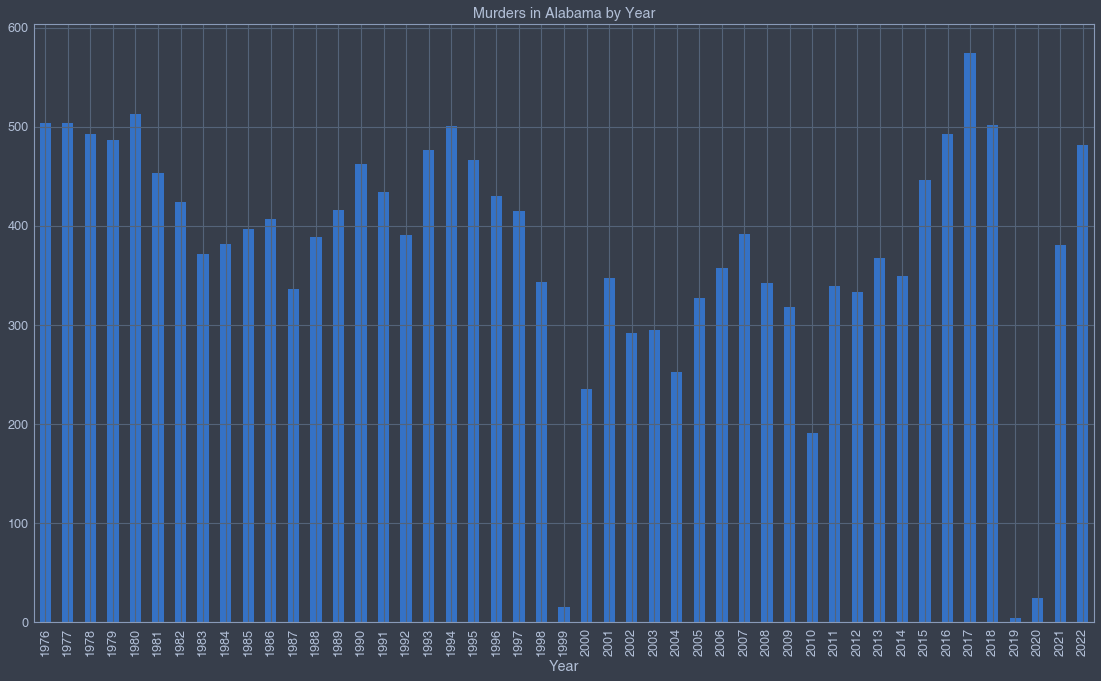

In [37]:
fig, ax = plt.subplots(figsize=(19, 11))
map_data[map_data['State']=='Alabama'].groupby('Year').count()['CNTYFIPS'].plot(kind='bar', ax=ax)
ax.set_title('Murders in Alabama by Year')

In [39]:
alabama_1992_dec.groupby('Weapon').count().iloc[:, 0]

Weapon
Blunt object - hammer, club, etc        5
Handgun - pistol, revolver, etc       196
Knife or cutting instrument            64
Other or type unknown                  74
Personal weapons, includes beating     17
Poison - does not include gas           1
Rifle                                  13
Shotgun                                21
Name: CNTYFIPS, dtype: int64

In [40]:
alabama_1992_dec[alabama_1992_dec['Weapon']=='Handgun - pistol, revolver, etc']

,CNTYFIPS,Ori,State,Agency,Agentype,Source,Solved,Year,Month,Incident,...,OffRace,OffEthnic,Weapon,Relationship,Circumstance,Subcircum,VicCount,OffCount,FileDate,MSA
ID,,,,,,,,,,,,,,,,,,,,,
199212001AL00100,"Jefferson, AL",AL00100,Alabama,Jefferson County,Sheriff,FBI,Yes,1992,December,1,...,White,Unknown or not reported,"Handgun - pistol, revolver, etc",Husband,Other arguments,NaN,0,0,43093.0,"Birmingham-Hoover, AL"
199212001AL00102,"Jefferson, AL",AL00102,Alabama,Birmingham,Municipal police,FBI,No,1992,December,1,...,Unknown,Unknown or not reported,"Handgun - pistol, revolver, etc",Relationship not determined,Circumstances undetermined,NaN,0,0,43093.0,"Birmingham-Hoover, AL"
199212001AL00104,"Jefferson, AL",AL00104,Alabama,Fairfield,Municipal police,FBI,Yes,1992,December,1,...,Black,Unknown or not reported,"Handgun - pistol, revolver, etc",Relationship not determined,Circumstances undetermined,NaN,0,0,43093.0,"Birmingham-Hoover, AL"
199212001AL00107,"Jefferson, AL",AL00107,Alabama,Midfield,Municipal police,FBI,Yes,1992,December,1,...,Black,Unknown or not reported,"Handgun - pistol, revolver, etc",Wife,Other arguments,NaN,0,0,43093.0,"Birmingham-Hoover, AL"
199212001AL00119,"Jefferson, AL",AL00119,Alabama,Hueytown,Municipal police,FBI,No,1992,December,1,...,Unknown,Unknown or not reported,"Handgun - pistol, revolver, etc",Relationship not determined,Circumstances undetermined,NaN,0,0,43093.0,"Birmingham-Hoover, AL"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199212129AL00102,"Jefferson, AL",AL00102,Alabama,Birmingham,Municipal police,FBI,Yes,1992,December,129,...,Black,Unknown or not reported,"Handgun - pistol, revolver, etc",In-law,Other arguments,NaN,0,0,43093.0,"Birmingham-Hoover, AL"
199212130AL00102,"Jefferson, AL",AL00102,Alabama,Birmingham,Municipal police,FBI,No,1992,December,130,...,Unknown,Unknown or not reported,"Handgun - pistol, revolver, etc",Relationship not determined,Narcotic drug laws,NaN,0,0,43093.0,"Birmingham-Hoover, AL"
199212131AL00102,"Jefferson, AL",AL00102,Alabama,Birmingham,Municipal police,FBI,Yes,1992,December,131,...,Black,Unknown or not reported,"Handgun - pistol, revolver, etc",Stranger,Circumstances undetermined,NaN,0,0,43093.0,"Birmingham-Hoover, AL"


In [14]:
MEAN_NUM_OF_MURDERS_BY_YEAR = map_data.groupby(['State', 'Year']).count()['CNTYFIPS'].groupby('State').mean()

def show_mean_murders_in(state:str)->None:
    cases = map_data.groupby(['State', 'Year']).count()['CNTYFIPS'][state].to_frame()
    cases.rename(columns={'CNTYFIPS': 'Murders'}, inplace=True)
    cases['Mean'] = MEAN_NUM_OF_MURDERS_BY_YEAR[state]
    
    fig, ax = plt.subplots(figsize=(21, 7))
    colors = ['b', 'gray']
    cases.plot(kind='bar', ax=ax, color=colors)

    ax.set_title(state)
    
    

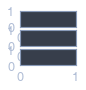

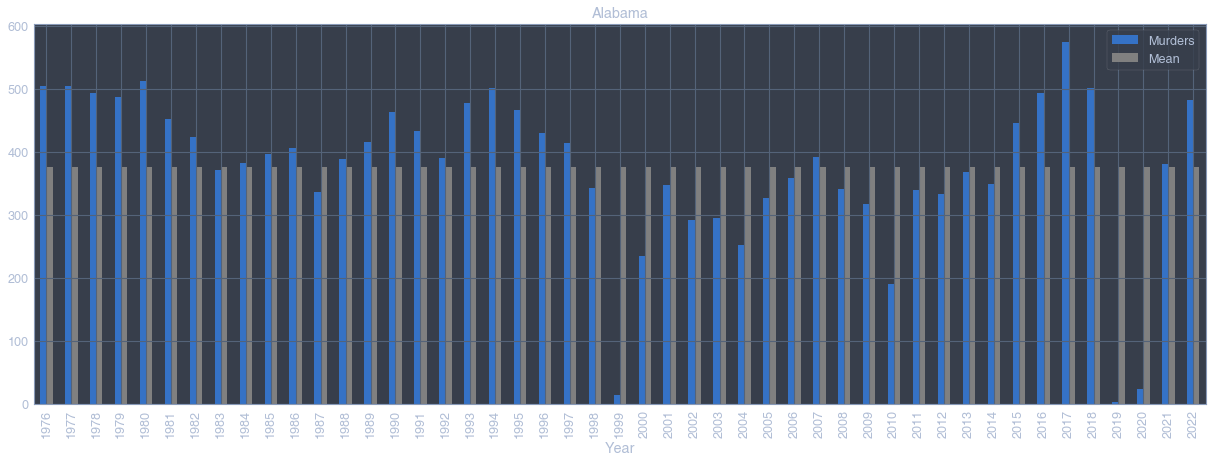

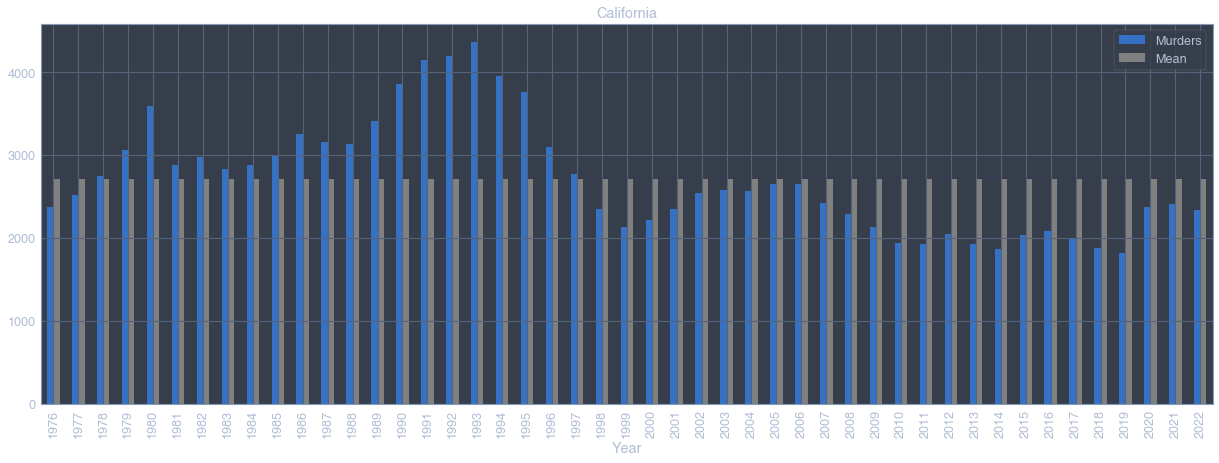

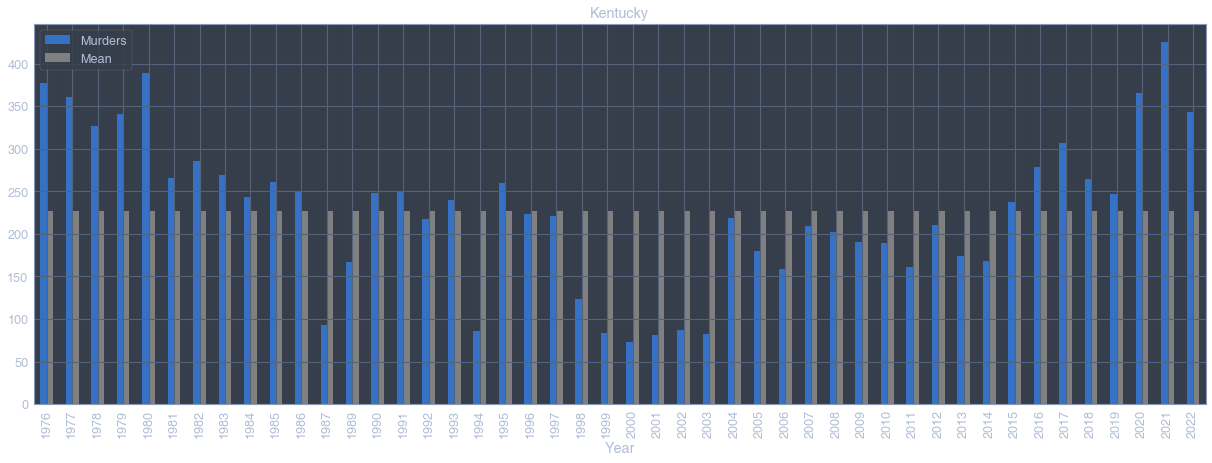

In [64]:
fig, ax = plt.subplots(3, 1, figsize=(1, 1))
show_mean_murders_in('Alabama')
show_mean_murders_in('California')
show_mean_murders_in('Kentucky')

In [24]:
map_data[(map_data['CNTYFIPS']=='Orleans, LA')].groupby('Year').count().loc[1985:2000]

,CNTYFIPS,Ori,State,Agency,Agentype,Source,Solved,Month,Incident,ActionType,...,OffRace,OffEthnic,Weapon,Relationship,Circumstance,Subcircum,VicCount,OffCount,FileDate,MSA
Year,,,,,,,,,,,,,,,,,,,,,
1985,160,160,160,160,160,160,160,160,160,160,...,160,160,160,160,160,9,160,160,160,160
1986,196,196,196,196,196,196,196,196,196,196,...,196,196,196,196,196,6,196,196,196,196
1987,132,132,132,132,132,132,132,132,132,132,...,132,132,132,132,132,9,132,132,132,132
1988,234,234,234,234,234,234,234,234,234,234,...,234,234,234,234,234,7,234,234,234,234
1989,264,264,264,264,264,264,264,264,264,264,...,264,264,264,264,264,12,264,264,264,264
1990,246,246,246,246,246,246,246,246,246,246,...,246,246,246,246,246,5,246,246,246,246
1992,305,305,305,305,305,305,305,305,305,305,...,305,305,305,305,305,9,305,305,305,305
1993,391,391,391,391,391,391,391,391,391,391,...,391,391,391,391,391,10,391,391,391,391
1994,430,430,430,430,430,430,430,430,430,430,...,430,430,430,430,430,10,430,430,430,430


In [30]:
map_data[(map_data['CNTYFIPS']=='Orleans, LA')
         & (map_data['Year'] > 1984)
         & (map_data['Year'] < 2001)].groupby('Weapon').count()

,CNTYFIPS,Ori,State,Agency,Agentype,Source,Solved,Year,Month,Incident,...,OffSex,OffRace,OffEthnic,Relationship,Circumstance,Subcircum,VicCount,OffCount,FileDate,MSA
Weapon,,,,,,,,,,,,,,,,,,,,,
Asphyxiation - includes death by gas,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,0,2,2,2,2
"Blunt object - hammer, club, etc",102,102,102,102,102,102,102,102,102,102,...,102,102,102,102,102,1,102,102,102,102
Drowning,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,0,2,2,2,2
Explosives,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,0,2,2,2,2
Fire,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,0,9,9,9,9
"Firearm, type not stated",14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,0,14,14,14,14
"Handgun - pistol, revolver, etc",3107,3107,3107,3107,3107,3107,3107,3107,3107,3107,...,3107,3107,3107,3107,3107,102,3107,3107,3107,3107
Knife or cutting instrument,326,326,326,326,326,326,326,326,326,326,...,326,326,326,326,326,9,326,326,326,326
Other gun,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,0,3,3,3,3


In [6]:
new_orleans_la = map_data[(map_data['CNTYFIPS']=='Orleans, LA')
                          & (map_data['Year'] > 1984)
                          & (map_data['Year'] < 2001)
                          & (map_data['Circumstance'] == 'Circumstances undetermined')]
new_orleans_la

,CNTYFIPS,Ori,State,Agency,Agentype,Source,Solved,Year,Month,Incident,...,OffRace,OffEthnic,Weapon,Relationship,Circumstance,Subcircum,VicCount,OffCount,FileDate,MSA
ID,,,,,,,,,,,,,,,,,,,,,
198501001LANPD00,"Orleans, LA",LANPD00,Louisiana,New Orleans,Municipal police,FBI,Yes,1985,January,1,...,White,Unknown or not reported,Other or type unknown,Ex-wife,Circumstances undetermined,NaN,0,0,43085.0,"New Orleans-Metairie-Kenner, LA"
198501002LANPD00,"Orleans, LA",LANPD00,Louisiana,New Orleans,Municipal police,FBI,Yes,1985,January,2,...,Black,Unknown or not reported,"Handgun - pistol, revolver, etc",Relationship not determined,Circumstances undetermined,NaN,0,0,43085.0,"New Orleans-Metairie-Kenner, LA"
198501003LANPD00,"Orleans, LA",LANPD00,Louisiana,New Orleans,Municipal police,FBI,No,1985,January,3,...,Unknown,Unknown or not reported,"Handgun - pistol, revolver, etc",Relationship not determined,Circumstances undetermined,NaN,0,0,43085.0,"New Orleans-Metairie-Kenner, LA"
198501008LANPD00,"Orleans, LA",LANPD00,Louisiana,New Orleans,Municipal police,FBI,No,1985,January,8,...,Unknown,Unknown or not reported,"Handgun - pistol, revolver, etc",Relationship not determined,Circumstances undetermined,NaN,0,0,43085.0,"New Orleans-Metairie-Kenner, LA"
198501009LANPD00,"Orleans, LA",LANPD00,Louisiana,New Orleans,Municipal police,FBI,Yes,1985,January,9,...,Black,Unknown or not reported,"Handgun - pistol, revolver, etc",Stranger,Circumstances undetermined,NaN,0,0,43085.0,"New Orleans-Metairie-Kenner, LA"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199912012LANPD00,"Orleans, LA",LANPD00,Louisiana,New Orleans,Municipal police,FBI,No,1999,December,12,...,Unknown,Unknown or not reported,"Handgun - pistol, revolver, etc",Relationship not determined,Circumstances undetermined,NaN,1,1,32300.0,"New Orleans-Metairie-Kenner, LA"
199912012LANPD00,"Orleans, LA",LANPD00,Louisiana,New Orleans,Municipal police,FBI,No,1999,December,12,...,Unknown,Unknown or not reported,"Handgun - pistol, revolver, etc",Relationship not determined,Circumstances undetermined,NaN,1,1,32300.0,"New Orleans-Metairie-Kenner, LA"
199912014LANPD00,"Orleans, LA",LANPD00,Louisiana,New Orleans,Municipal police,FBI,No,1999,December,14,...,Unknown,Unknown or not reported,"Handgun - pistol, revolver, etc",Relationship not determined,Circumstances undetermined,NaN,0,0,32300.0,"New Orleans-Metairie-Kenner, LA"


In [7]:
new_orleans_la.groupby('Weapon').count()

,CNTYFIPS,Ori,State,Agency,Agentype,Source,Solved,Year,Month,Incident,...,OffSex,OffRace,OffEthnic,Relationship,Circumstance,Subcircum,VicCount,OffCount,FileDate,MSA
Weapon,,,,,,,,,,,,,,,,,,,,,
Asphyxiation - includes death by gas,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,1
"Blunt object - hammer, club, etc",43,43,43,43,43,43,43,43,43,43,...,43,43,43,43,43,0,43,43,43,43
Explosives,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,1
Fire,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,0,2,2,2,2
"Firearm, type not stated",8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,0,8,8,8,8
"Handgun - pistol, revolver, etc",1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,...,1383,1383,1383,1383,1383,0,1383,1383,1383,1383
Knife or cutting instrument,104,104,104,104,104,104,104,104,104,104,...,104,104,104,104,104,0,104,104,104,104
Other gun,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,1
Other or type unknown,39,39,39,39,39,39,39,39,39,39,...,39,39,39,39,39,0,39,39,39,39


In [10]:
new_orleans_la.groupby(['Solved', 'VicSex']).count()

CNTYFIPS   Ori  State  Agency  Agentype  Source  Year  Month  \
Solved VicSex                                                                  
No     Female        150   150    150     150       150     150   150    150   
       Male         1155  1155   1155    1155      1155    1155  1155   1155   
       Unknown         6     6      6       6         6       6     6      6   
Yes    Female         59    59     59      59        59      59    59     59   
       Male          344   344    344     344       344     344   344    344   

                Incident  ActionType  ...  OffRace  OffEthnic  Weapon  \
Solved VicSex                         ...                               
No     Female        150         150  ...      150        150     150   
       Male         1155        1155  ...     1155       1155    1155   
       Unknown         6           6  ...        6          6       6   
Yes    Female         59          59  ...       59         59      59   
       Male          344         344  ...      344        344     344   

                Relationship  Circumstance  Subcircum  VicCount  OffCount  \
Solved VicSex                                                               
No     Female            150           150          0       150       150   
       Male             1155          1155          0      1155      1155   
       Unknown             6             6          0         6         6   
Yes    Female             59            59          0        59        59   
       Male              344           344          0       344       344   

                FileDate   MSA  
Solved VicSex                   
No     Female        150   150  
       Male         1155  1155  
       Unknown         6     6  
Yes    Female         59    59  
       Male          344   344  

[5 rows x 27 columns]

In [11]:
new_orleans_la_female_not_solved = new_orleans_la[(new_orleans_la['VicSex'] == 'Female')
                                                  & (new_orleans_la['Solved'] == 'No')]
new_orleans_la_female_not_solved

,CNTYFIPS,Ori,State,Agency,Agentype,Source,Solved,Year,Month,Incident,...,OffRace,OffEthnic,Weapon,Relationship,Circumstance,Subcircum,VicCount,OffCount,FileDate,MSA
ID,,,,,,,,,,,,,,,,,,,,,
198501010LANPD00,"Orleans, LA",LANPD00,Louisiana,New Orleans,Municipal police,FBI,No,1985,January,10,...,Unknown,Unknown or not reported,"Blunt object - hammer, club, etc",Relationship not determined,Circumstances undetermined,NaN,0,0,43085.0,"New Orleans-Metairie-Kenner, LA"
198501013LANPD00,"Orleans, LA",LANPD00,Louisiana,New Orleans,Municipal police,FBI,No,1985,January,13,...,Unknown,Unknown or not reported,"Handgun - pistol, revolver, etc",Relationship not determined,Circumstances undetermined,NaN,0,0,43085.0,"New Orleans-Metairie-Kenner, LA"
198502008LANPD00,"Orleans, LA",LANPD00,Louisiana,New Orleans,Municipal police,FBI,No,1985,February,8,...,Unknown,Unknown or not reported,"Personal weapons, includes beating",Relationship not determined,Circumstances undetermined,NaN,0,0,43085.0,"New Orleans-Metairie-Kenner, LA"
198503006LANPD00,"Orleans, LA",LANPD00,Louisiana,New Orleans,Municipal police,FBI,No,1985,March,6,...,Unknown,Unknown or not reported,Knife or cutting instrument,Relationship not determined,Circumstances undetermined,NaN,0,0,60485.0,"New Orleans-Metairie-Kenner, LA"
198504013LANPD00,"Orleans, LA",LANPD00,Louisiana,New Orleans,Municipal police,FBI,No,1985,April,13,...,Unknown,Unknown or not reported,"Personal weapons, includes beating",Relationship not determined,Circumstances undetermined,NaN,0,0,71185.0,"New Orleans-Metairie-Kenner, LA"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199812010LANPD00,"Orleans, LA",LANPD00,Louisiana,New Orleans,Municipal police,FBI,No,1998,December,10,...,Unknown,Unknown or not reported,"Handgun - pistol, revolver, etc",Relationship not determined,Circumstances undetermined,NaN,1,1,30399.0,"New Orleans-Metairie-Kenner, LA"
199909004LANPD00,"Orleans, LA",LANPD00,Louisiana,New Orleans,Municipal police,FBI,No,1999,September,4,...,Unknown,Unknown or not reported,"Handgun - pistol, revolver, etc",Relationship not determined,Circumstances undetermined,NaN,0,0,30300.0,"New Orleans-Metairie-Kenner, LA"
199910009LANPD00,"Orleans, LA",LANPD00,Louisiana,New Orleans,Municipal police,FBI,No,1999,October,9,...,Unknown,Unknown or not reported,Knife or cutting instrument,Relationship not determined,Circumstances undetermined,NaN,0,0,32300.0,"New Orleans-Metairie-Kenner, LA"


In [13]:
new_orleans_la_female_not_solved.groupby('Weapon').count()

,CNTYFIPS,Ori,State,Agency,Agentype,Source,Solved,Year,Month,Incident,...,OffSex,OffRace,OffEthnic,Relationship,Circumstance,Subcircum,VicCount,OffCount,FileDate,MSA
Weapon,,,,,,,,,,,,,,,,,,,,,
Asphyxiation - includes death by gas,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,1
"Blunt object - hammer, club, etc",10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,0,10,10,10,10
Fire,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,1
"Firearm, type not stated",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,1
"Handgun - pistol, revolver, etc",81,81,81,81,81,81,81,81,81,81,...,81,81,81,81,81,0,81,81,81,81
Knife or cutting instrument,17,17,17,17,17,17,17,17,17,17,...,17,17,17,17,17,0,17,17,17,17
Other or type unknown,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,0,7,7,7,7
"Personal weapons, includes beating",27,27,27,27,27,27,27,27,27,27,...,27,27,27,27,27,0,27,27,27,27
Shotgun,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,0,2,2,2,2


In [14]:
new_orleans_la_female_not_solved.groupby('Year').count()

,CNTYFIPS,Ori,State,Agency,Agentype,Source,Solved,Month,Incident,ActionType,...,OffRace,OffEthnic,Weapon,Relationship,Circumstance,Subcircum,VicCount,OffCount,FileDate,MSA
Year,,,,,,,,,,,,,,,,,,,,,
1985,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,0,10,10,10,10
1986,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,0,7,7,7,7
1987,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,0,9,9,9,9
1988,17,17,17,17,17,17,17,17,17,17,...,17,17,17,17,17,0,17,17,17,17
1989,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,0,13,13,13,13
1990,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,0,7,7,7,7
1992,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,0,7,7,7,7
1993,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,0,10,10,10,10
1994,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,0,13,13,13,13


## Female, Murder and non-negligent manslaughter, Solved and No Solved cases 

In [3]:
not_solved_cases_f = map_data[(map_data['Solved']=='No')
                              & (map_data['VicSex']=='Female')
                              & (map_data['Homicide']=='Murder and non-negligent manslaughter')]

solved_cases_f = map_data[(map_data['Solved']=='Yes')
                          & (map_data['VicSex']=='Female')
                          & (map_data['Homicide']=='Murder and non-negligent manslaughter')]

In [4]:
not_solved_f_by_state = not_solved_cases_f.groupby('State').count()['CNTYFIPS']
not_solved_f_by_year = not_solved_cases_f.groupby('Year').count()['CNTYFIPS']

solved_f_by_state = solved_cases_f.groupby('State').count()['CNTYFIPS']
solved_f_by_year = solved_cases_f.groupby('Year').count()['CNTYFIPS']

In [8]:
by_state = pd.merge(not_solved_f_by_state.to_frame(), solved_f_by_state.to_frame(), left_index=True, right_index=True)
by_state.rename(columns={'CNTYFIPS_x': 'Not Solved', 'CNTYFIPS_y': 'Solved'}, inplace=True)

In [5]:
by_year = pd.merge(not_solved_f_by_year.to_frame(), solved_f_by_year.to_frame(), left_index=True, right_index=True)
by_year.rename(columns={'CNTYFIPS_x': 'Not Solved', 'CNTYFIPS_y': 'Solved'}, inplace=True)

Text(0.5, 1.0, 'Solved and Not Solved Cases of Female Victims by Year')

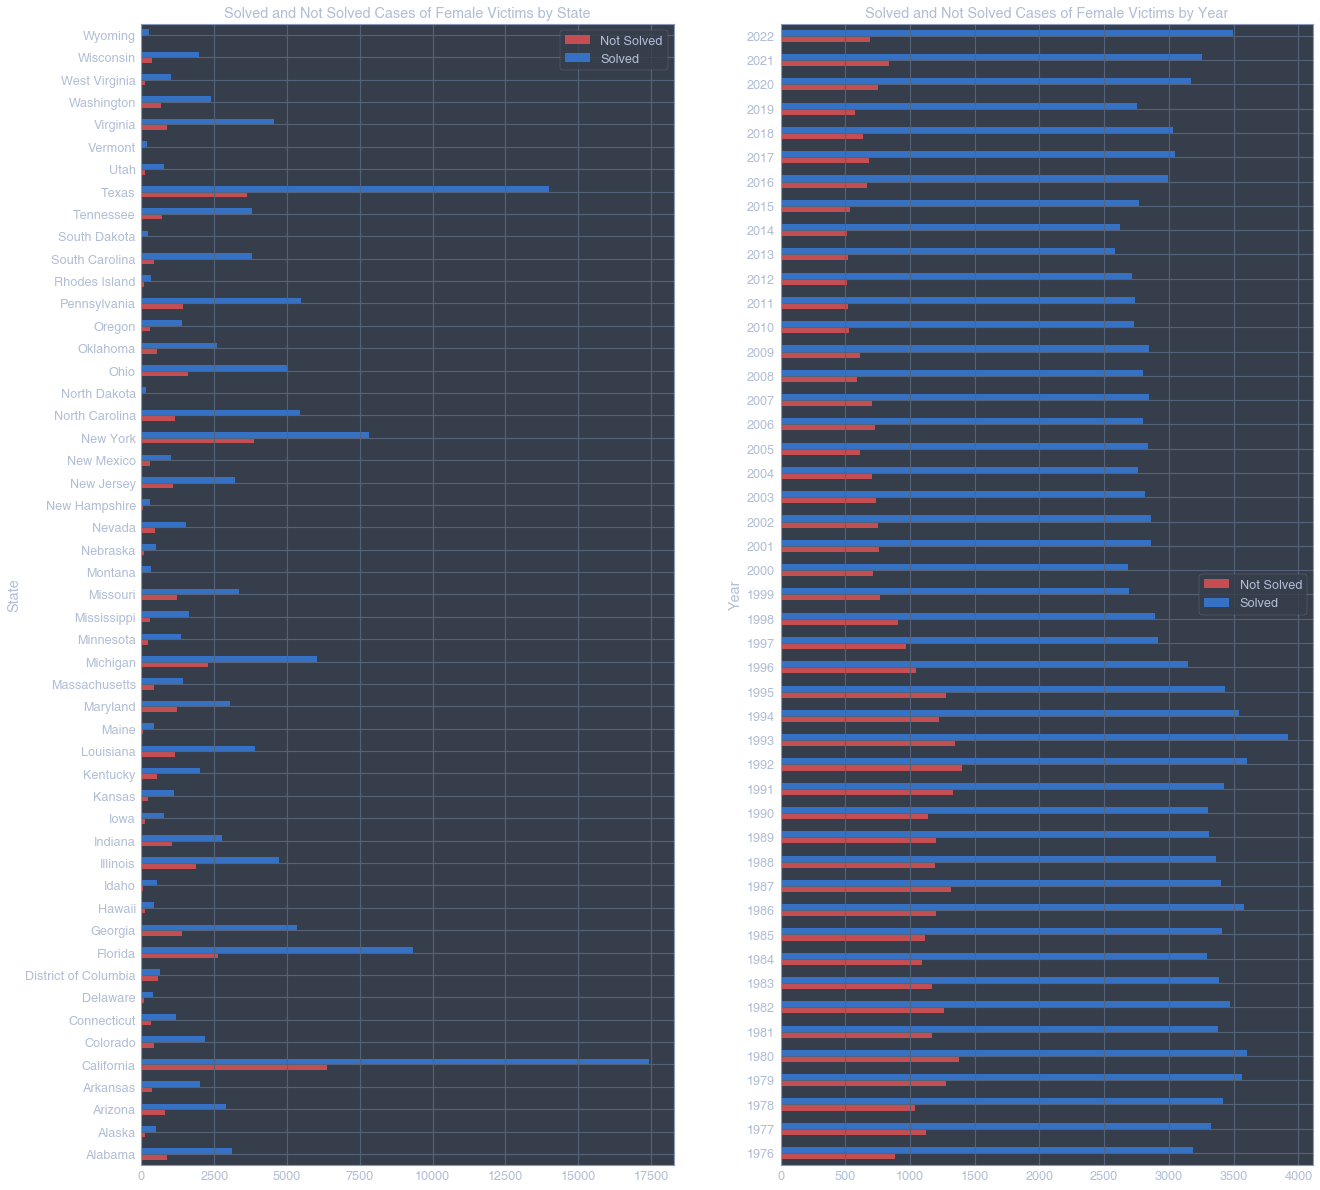

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(21, 21))

colors=['r', 'b']

by_state.plot(kind='barh', ax=ax[0], color=colors)
ax[0].set_title('Solved and Not Solved Cases of Female Victims by State')

by_year.plot(kind='barh', ax=ax[1], color=colors)
ax[1].set_title('Solved and Not Solved Cases of Female Victims by Year')

In [20]:
by_state['Prop'] = by_state['Solved'] / by_state['Not Solved']

In [25]:
by_state[by_state['Prop']<3]

,Not Solved,Solved,Prop
State,,,
California,6357,17422,2.740601
District of Columbia,586,622,1.061433
Illinois,1872,4712,2.517094
Indiana,1034,2779,2.687621
Maryland,1215,3059,2.517695
Michigan,2272,6038,2.657570
Missouri,1206,3338,2.767828
New Jersey,1090,3213,2.947706
New York,3864,7811,2.021480


In [27]:
by_state['Prop'].describe()

count    51.000000
mean      5.278726
std       3.300847
min       1.061433
25%       3.428937
50%       4.302521
75%       5.825772
max      20.750000
Name: Prop, dtype: float64

In [22]:
map_data.dtypes

CNTYFIPS         object
Ori              object
State            object
Agency           object
Agentype         object
Source           object
Solved           object
Year              int64
Month            object
Incident          int64
ActionType       object
Homicide         object
Situation        object
VicAge            int64
VicSex           object
VicRace          object
VicEthnic        object
OffAge            int64
OffSex           object
OffRace          object
OffEthnic        object
Weapon           object
Relationship     object
Circumstance     object
Subcircum        object
VicCount          int64
OffCount          int64
FileDate        float64
MSA              object
dtype: object

In [5]:
not_solved_f_by_age = not_solved_cases_f.groupby('VicAge').count()['CNTYFIPS']
not_solved_f_by_circumstance = not_solved_cases_f.groupby('Circumstance').count()['CNTYFIPS']
not_solved_f_by_weapon = not_solved_cases_f.groupby('Weapon').count()['CNTYFIPS']

<AxesSubplot:ylabel='Weapon'>

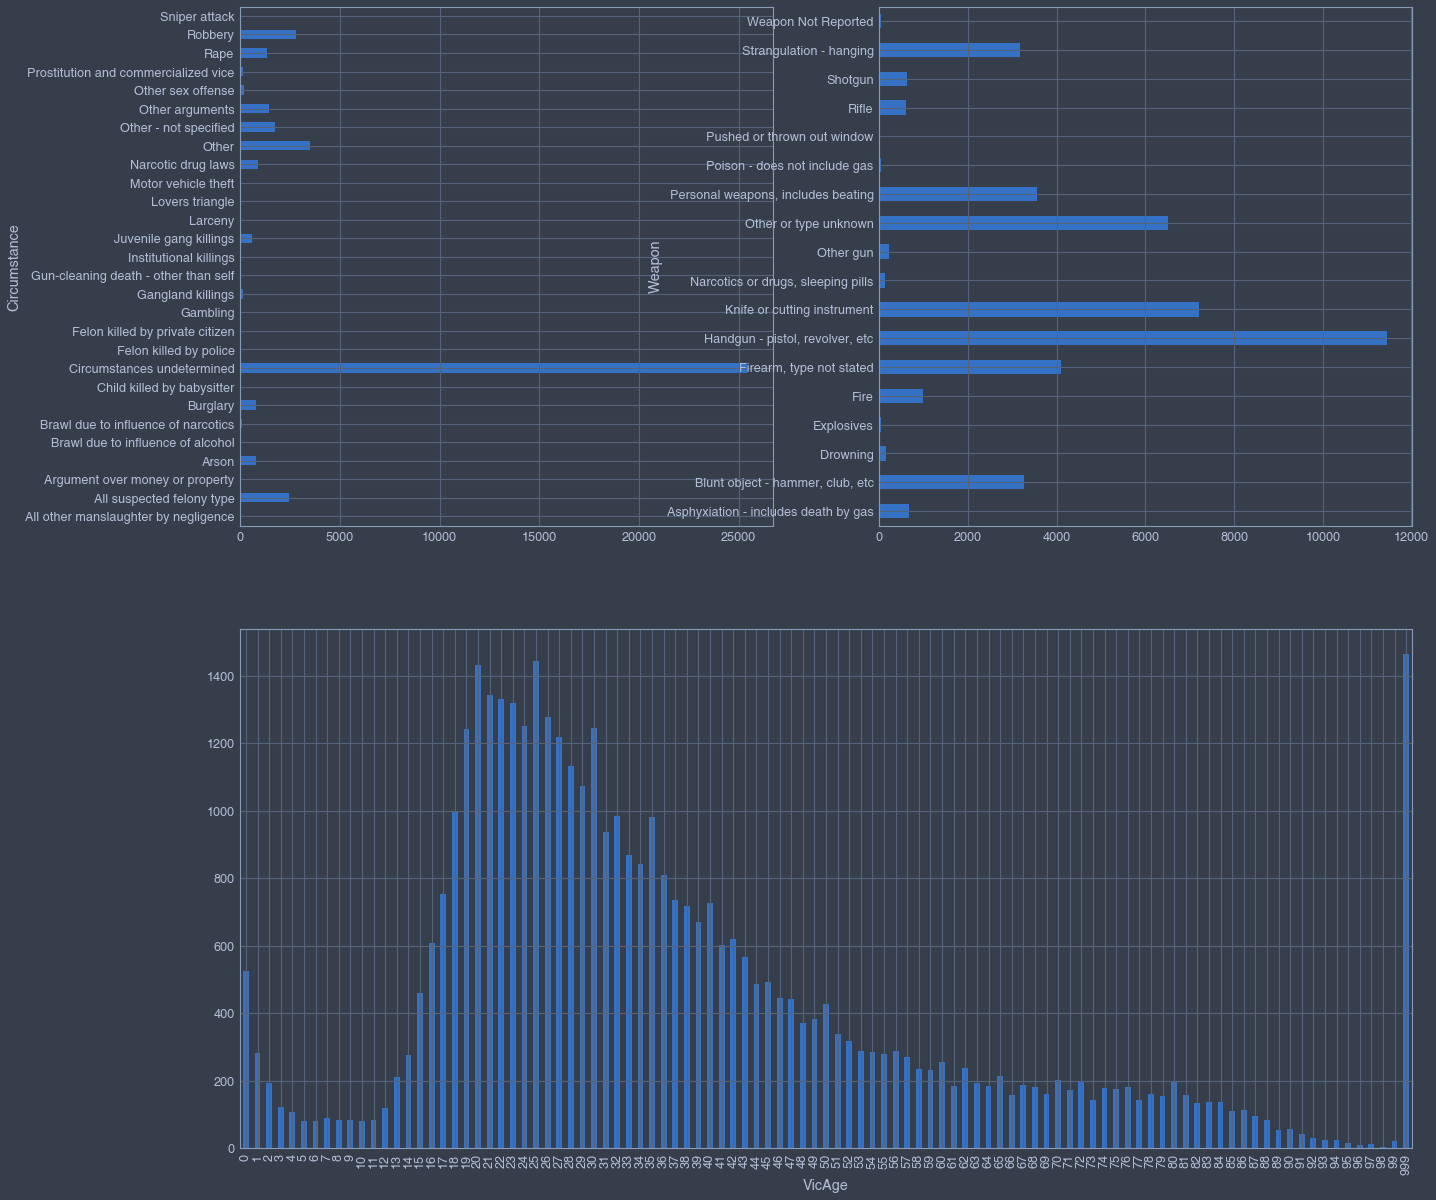

In [38]:
fig = plt.subplots(figsize=(21, 21))
ax1 = plt.subplot(212)
ax2 = plt.subplot(221)
ax3 = plt.subplot(222)
not_solved_f_by_age.plot(kind='bar', ax=ax1)
not_solved_f_by_circumstance.plot(kind='barh', ax=ax2)
not_solved_f_by_weapon.plot(kind='barh', ax=ax3)

In [10]:
not_solved_cases_f = not_solved_cases_f[(not_solved_cases_f['VicAge'] > 14) & (not_solved_cases_f['VicAge'] < 48)]

In [25]:
race_and_age = not_solved_cases_f.groupby(['VicRace', 'VicAge']).count()['CNTYFIPS'].loc['White'].to_frame()
race_and_age['Black'] = not_solved_cases_f.groupby(['VicRace', 'VicAge']).count()['CNTYFIPS'].loc['Black']
race_and_age.rename(columns={'CNTYFIPS': 'White'}, inplace=True)

Text(0.5, 1.0, 'Female, not solved cases')

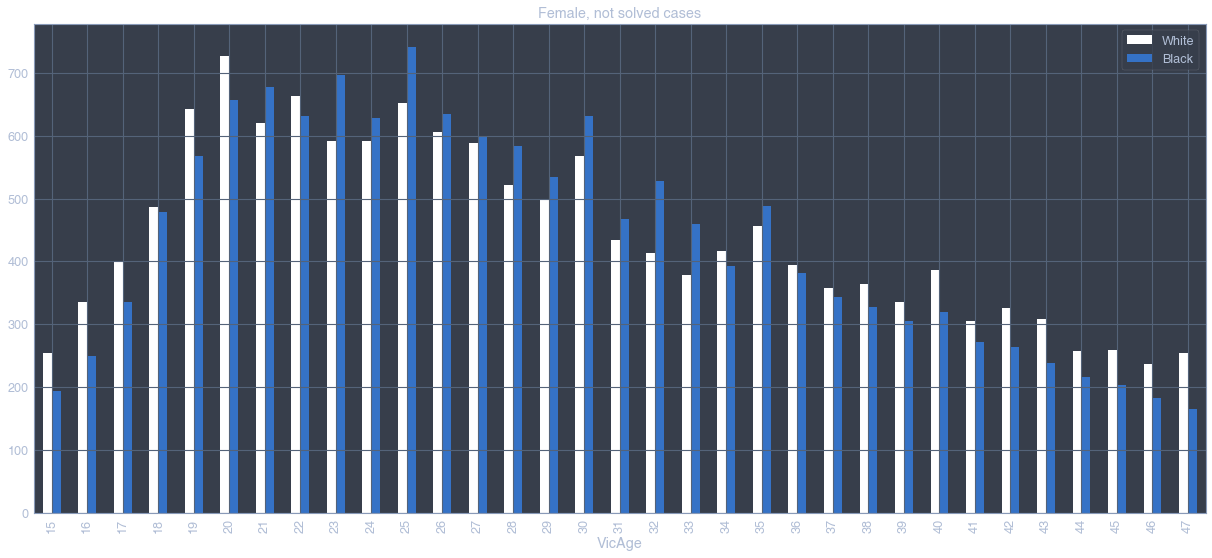

In [31]:
fig, ax = plt.subplots(figsize=(21, 9))
colors = ['w', 'b']
race_and_age.plot(kind='bar', color=colors, ax=ax)
ax.set_title('Female, not solved cases')